In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Acceptance-rejection sampling
- generate $10^6$ points uniformly within $-1, 1$ square
- compute fraction $r$ of points within a unit circle
- repeat for different dimension numbers $d: 2, 3, 4, ..., 15$
- plot $r$ as a function of $d$
- assign an uncertainty to $r$ estimation
- compare with theoretical expectation for $r$
    - $n$-ball volume: $V_n(R) = \frac{\pi^{n / 2}}{\Gamma(n/2 + 1)} R^n$
    - theoretical limit value $r = \frac{V_n(1)}{2^n}$ 

In [10]:
import scipy.special


def log_factorial(n: int) -> int:
    return sum(np.log(i) for i in range(1, n + 1))


def r_theoredical(d: int) -> int:
    return np.exp(
        d / 2 * np.log(np.pi) - scipy.special.loggamma(d / 2 + 1) - d * np.log(2)
    )

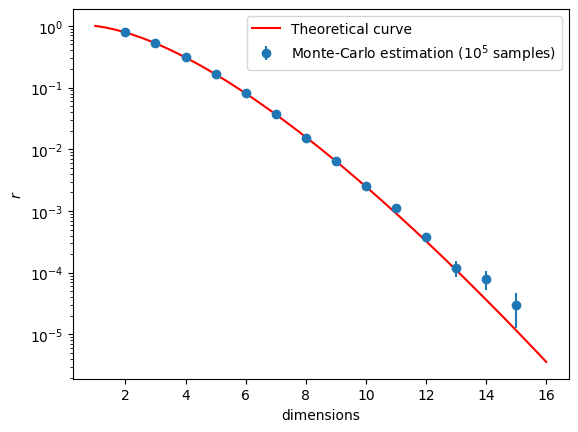

In [44]:
SAMPLE_SIZE = int(1e5)

fig, ax = plt.subplots()

d_max = 15
d_sample = list(range(2, d_max + 1))
r_estimations = []
r_errors = []
for d in d_sample:
    points = np.random.uniform(low=-1, high=1, size=(SAMPLE_SIZE, d))
    success_count = np.count_nonzero((points**2).sum(axis=1) < 1)
    r_est = success_count / SAMPLE_SIZE
    r_estimations.append(r_est)
    r_errors.append(np.sqrt(SAMPLE_SIZE * r_est * (1 - r_est)) / SAMPLE_SIZE)

d_range = np.linspace(1, d_max + 1)
ax.plot(
    d_range,
    [r_theoredical(d) for d in d_range],
    color="r",
    label="Theoretical curve",
)

ax.errorbar(
    d_sample,
    r_estimations,
    r_errors,
    fmt="o",
    label=f"Monte-Carlo estimation ($10^{{{int(np.log10(SAMPLE_SIZE))}}}$ samples)",
)

ax.set_yscale("log")
ax.legend()

ax.set_xlabel("dimensions")
ax.set_ylabel("$r$")

plt.show()

# Random number correlation
- generate $1 + 10^5$ numbers $x_i$ distributed $\sim \mathcal{N}(3, 2)$
- plot the distribution of $x_i$ and of $x_i - x_{i - 1}$
- do the same but with MCMC algorithm
	- use $\mathcal{N}(x_0, 0.3)$ as proposal distribution
- can we explain standard deviation of the distribution of $x_i - x_{i-1}$ for two cases?